<h2 style="color: Red;">RFM analysis using K-means clustering</h2>


In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [262]:
df=pd.read_csv('OnlineRetail.csv',encoding='unicode_escape') #used-->encoding='unicode_escape' cause some of the character in unicode.
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [263]:
df.dtypes 

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [264]:
currentDate=pd.to_datetime("2012-01-01")

In [265]:
df.InvoiceDate=pd.to_datetime(df.InvoiceDate)

In [266]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [267]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [271]:
maxdate=df.groupby(df.CustomerID).max()[['InvoiceDate']]
maxdate

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


***Find Recency***

In [276]:
#Find recency
maxdate['InvoiceAge']=(currentDate-maxdate['InvoiceDate']).dt.days
maxdate

,InvoiceDate,InvoiceAge
CustomerID,,
12346.0,2011-01-18 10:17:00,347
12347.0,2011-12-07 15:52:00,24
12348.0,2011-09-25 13:13:00,97
12349.0,2011-11-21 09:51:00,40
12350.0,2011-02-02 16:01:00,332
...,...,...
18280.0,2011-03-07 09:52:00,299
18281.0,2011-06-12 10:53:00,202
18282.0,2011-12-02 11:43:00,29


In [277]:
recency=maxdate.drop('InvoiceDate',axis=1)
recency

,InvoiceAge
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


***Find Frequency***

In [282]:
#InvoiceNo duplicate cause of customer buys many things at once
freq=df.drop_duplicates(subset='InvoiceNo')
freq

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom


In [284]:
freq=freq.groupby(['CustomerID']).count()[['InvoiceNo']]
freq

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


***Monetary***

In [287]:
df['total']=df.Quantity*df.UnitPrice

In [289]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [291]:
money=df.groupby(['CustomerID'])[["total"]].sum()
money

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [293]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [295]:
RFM=pd.concat([recency,freq,money],axis=1)

In [297]:
RFM

,InvoiceAge,InvoiceNo,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [299]:
RFM.columns=['Recency','Frequency','Monetary'] #change column names
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


***Build model Using K-mean Algo***

**We can find how many clusters are better for this using Elbow Method**

*Find sum of squre error to use Elbow Method*


***At first we have to scale the data***

In [305]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
scaled=Scaler.fit_transform(RFM)

In [307]:
scaled.shape

(4372, 3)

***Impliment Elbow Method***

In [310]:
from sklearn.cluster import KMeans

In [312]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(scaled)
    sse.append(km.inertia_)  #sse--> sum of squre error----inertia_-->finds the value of sse

In [314]:
sse

[13116.0,
 9424.42051686682,
 6074.266479920812,
 4081.896097033866,
 3554.6241249614955,
 2558.246629602948,
 2024.0388483998227,
 1593.8821789511746,
 1437.768795905813]

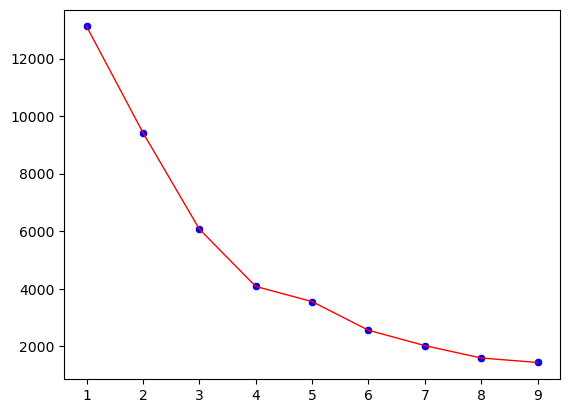

In [316]:
sns.scatterplot(x=k_range, y=sse, color='blue', marker='o');
sns.lineplot(x=k_range, y=sse, color='red', linewidth=1);
plt.xlabel='K'
plt.ylabel='SSE'

***Doing K-mean***

In [319]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)

KMeans(n_clusters=3)

In [321]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [323]:
kmeans.labels_.shape

(4372,)

In [325]:
RFM['Clusters']=(kmeans.labels_+1)

In [327]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12347.0,24,7,4310.00,2
12348.0,97,4,1797.24,2
12349.0,40,1,1757.55,2
12350.0,332,1,334.40,1
...,...,...,...,...
18280.0,299,1,180.60,1
18281.0,202,1,80.82,1
18282.0,29,3,176.60,2


In [341]:
RFM.Clusters.unique()

array([1, 2, 3])

In [343]:
RFM[RFM.Clusters==1]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12350.0,332,1,334.40,1
12353.0,226,1,89.00,1
12354.0,254,1,1079.40,1
12355.0,236,1,459.40,1
...,...,...,...,...
18260.0,194,8,2595.00,1
18262.0,162,1,149.48,1
18269.0,380,2,138.90,1


In [345]:
RFM[RFM.Clusters==2]



,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12347.0,24,7,4310.00,2
12348.0,97,4,1797.24,2
12349.0,40,1,1757.55,2
12352.0,58,11,1545.41,2
12356.0,44,3,2811.43,2
...,...,...,...,...
18277.0,80,2,97.63,2
18278.0,95,1,173.90,2
18282.0,29,3,176.60,2


In [347]:
RFM[RFM.Clusters==3]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12415.0,46,26,123725.45,3
12748.0,22,224,29072.10,3
13089.0,24,118,57385.88,3
13694.0,25,60,62653.10,3
14156.0,31,66,113384.14,3
14606.0,23,128,11713.85,3
14646.0,23,77,279489.02,3
14911.0,23,248,132572.62,3
15311.0,22,118,59419.34,3


In [349]:
final=RFM.groupby("Clusters").mean()

In [351]:
final

,Recency,Frequency,Monetary
Clusters,,,
1,267.527502,1.853922,460.132111
2,61.400739,5.743613,1938.130001
3,28.428571,105.214286,106628.209286


In [355]:
def func(row):
    if row["Clusters"]==3:
        return 'Dimond'
    elif row["Clusters"]==2:
        return 'Gold'
    else:
        return 'Sliver'

In [357]:
RFM['Group']=RFM.apply(func,axis=1)
RFM

,Recency,Frequency,Monetary,Clusters,Group
CustomerID,,,,,
12346.0,347,2,0.00,1,Sliver
12347.0,24,7,4310.00,2,Gold
12348.0,97,4,1797.24,2,Gold
12349.0,40,1,1757.55,2,Gold
12350.0,332,1,334.40,1,Sliver
...,...,...,...,...,...
18280.0,299,1,180.60,1,Sliver
18281.0,202,1,80.82,1,Sliver
18282.0,29,3,176.60,2,Gold


In [361]:
result=pd.DataFrame(RFM.Group.value_counts())

In [365]:
result=result.reset_index()
result

,Group,count
0,Gold,3249
1,Sliver,1109
2,Dimond,14


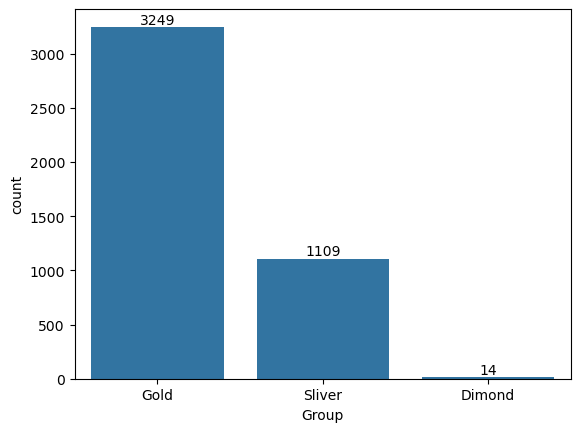

In [381]:
datalabel=sns.barplot(x='Group',y='count',data=result,estimator=np.sum)
for i in datalabel.containers:
    datalabel.bar_label(i,)